# Reddit Subreddits Analysis
* 每个 subreddit 的描述、语言、成员数量（近似活跃用户） / Description, language, and member count (approximate active users) for each subreddit.

* 是否被封禁/封锁（moderation 状态）/ Whether it is banned/blocked (moderation status).

* moderators_count 列表（可以反映管理强度）  / Moderators count list (which can reflect moderation strength).

* 规则（如有）/ Rules (if available).

* 是否为 NSFW / Whether it is NSFW.

| 字段名             | Chinese                               | English                             |
|--------------------|--------------------------------------------|------------------------------------------------|
| `name`             | subreddit 名称                             | subreddit name                                 |
| `title`            | 显示标题                                   | title                                          |
| `description`      | 简介（与 Mastodon 的 description 类似）    | description (similar to Mastodon's description)|
| `language`         | 内容语言                                   | content language                               |
| `subscribers`      | 订阅者数                                   | number of subscribers                          |
| `active_user_count`| 当前活跃人数（与 Mastodon usage 相似）     | active user count (similar to Mastodon's usage)|
| `over18`           | 是否 NSFW                                  | whether it's NSFW                              |
| `quarantine`       | 是否被隔离                                 | whether it's quarantined                       |
| `is_restricted`    | 是否为受限访问的子版块                     | whether it's a restricted subreddit            |
| `moderators_count` | 管理员人数（Mastodon 中类似于规则维护者）  | number of moderators (similar to rule maintainers in Mastodon) |
| `rules`            | 社区规则列表                               | list of community rules                        |


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. 读取数据: top100热门subreddits/我特殊找的可能有R18之类的subreddits. 数据获取是reddit.py, 默认会出reddit_subreddits_data.csv, 可以改名
# df = pd.read_csv('reddit_subreddits_data_top100.csv')
df = pd.read_csv('reddit_subreddits_data_NSFW.csv')

df.head()

# print("Missing values:\n", df.isnull().sum())


,name,title,description,language,subscribers,active_user_count,over18,quarantine,is_restricted,moderators_count,rules
0,NSFW,Not Safe for Work,This is a porn share subreddit.,en,4438692,582,True,False,False,6,This is a porn subreddit. Anything not porn do...
1,sex,Sex,r/sex is for civil discussions pertaining to e...,en,2723708,1731,False,False,False,17,ENGAGE CONSTRUCTIVELY AT ALL TIMES; READ THE F...
2,Conspiracy,conspiracy,This is a forum for free thinking and for disc...,en,2207593,757,False,False,False,8,Bigoted slurs are not tolerated.; Address the ...
3,anime_titties,Anime Titties,World Politics and News\n\nhttps://discord.gg/...,en,575965,148,False,False,False,14,[1] Follow Reddit's sitewide policies; [2.1] T...
4,WTF,WTF?!,"Things that will make others say ""What the F*ck"".",en,7050397,4770,False,False,False,9,No Screenshots/Recordings; No Personal Informa...


In [ ]:
# Getting rules for a specific subreddit
# 3. 获取特定 subreddit 的规则
subreddit_name = 'NSFW'  # Change to any subreddit name / 更改为任何想要查询的 subreddit 名称
if subreddit_name not in df['name'].values:
    print(f"Subreddit '{subreddit_name}' not found in the dataset.")
else:
    rules = df[df['name'] == subreddit_name]['rules'].iloc[0]
    print(f"Rules for subreddit '{subreddit_name}':\n")
    for rule in rules.split(';'):
        print(rule.strip()) 

Rules for subreddit 'NSFW':

This is a porn subreddit. Anything not porn doesn't belong here.
DO NOT post original content (posting of yourself or your partner) in this subreddit.
No spam or self-promotion
Direct links to single still images or GIFs only
No SFW content
Excessive x-posting and top-mining are forbidden. A couple of x-posts are allowed.
Don't repost something from our top 100 of all time.
Want to find where an image comes from or who a model is? Search for yourself! Do not ask here.
There is zero tolerance for trolls
Do not re-post any r/Gonewild content.
Discord links are forbidden


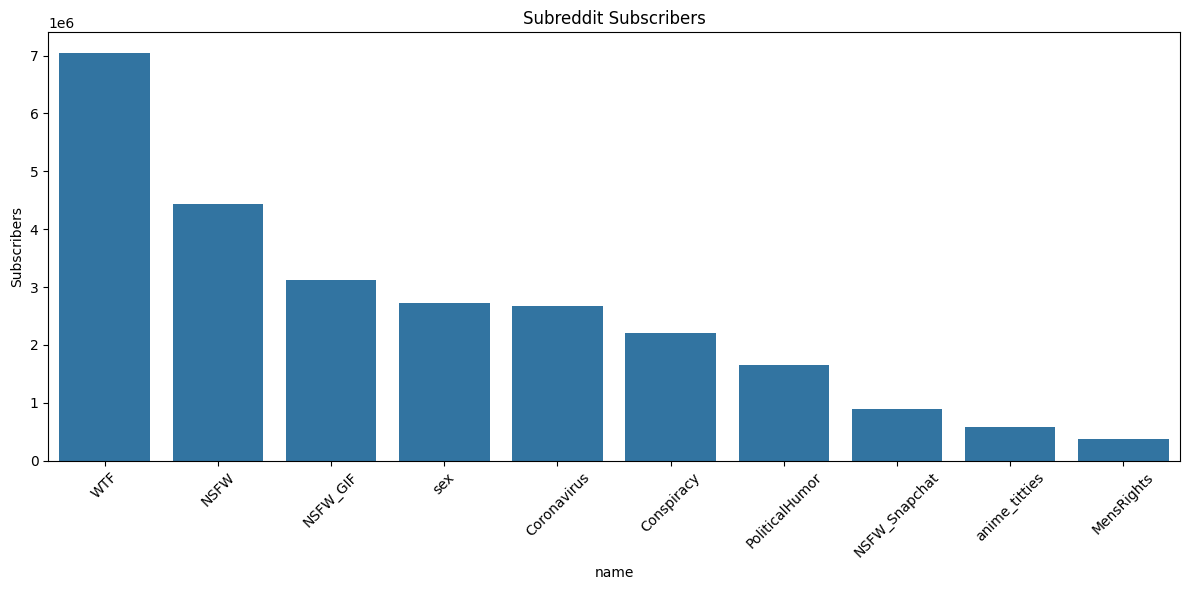

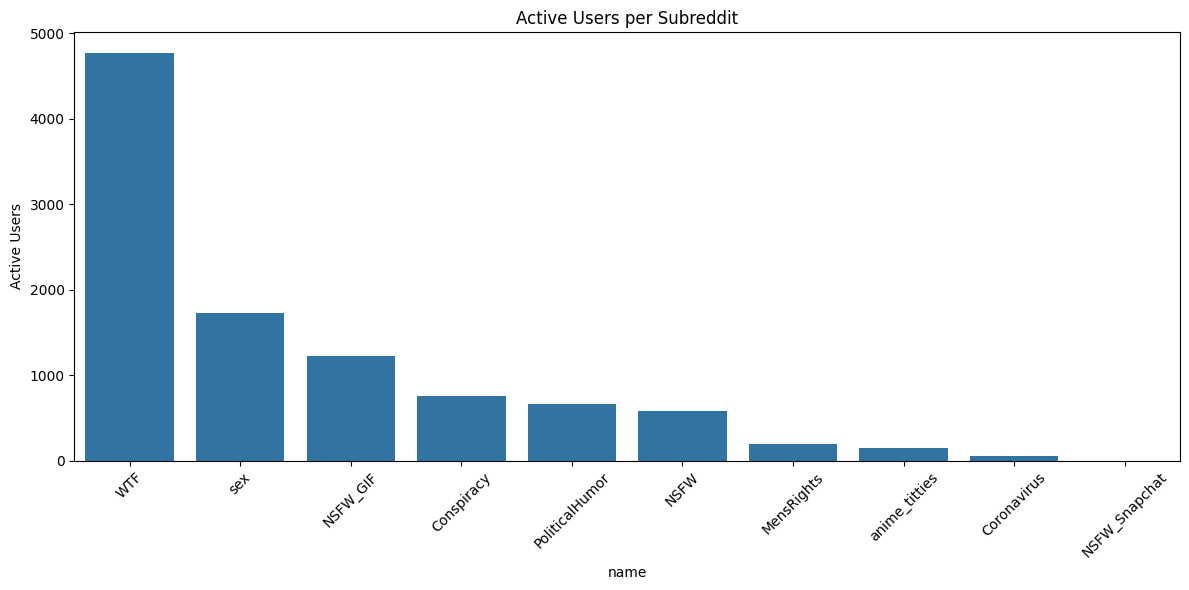

In [5]:
# 5. 可视化订阅者数 vs 活跃用户数（柱状图）
plt.figure(figsize=(12,6))
sns.barplot(x='name', y='subscribers', data=df.sort_values('subscribers', ascending=False))
plt.title('Subreddit Subscribers')
plt.ylabel('Subscribers')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12,6))
sns.barplot(x='name', y='active_user_count', data=df.sort_values('active_user_count', ascending=False))
plt.title('Active Users per Subreddit')
plt.ylabel('Active Users')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

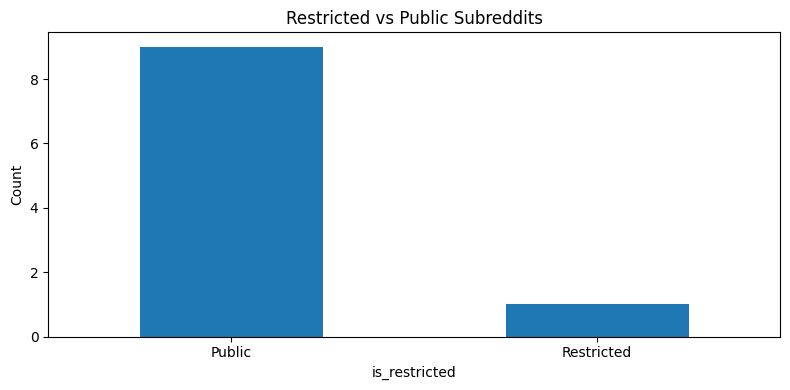

In [6]:
# 6. 可视化限制性状态
plt.figure(figsize=(8,4))
df['is_restricted'].value_counts().plot(kind='bar')
plt.title('Restricted vs Public Subreddits')
plt.xticks(ticks=[0,1], labels=['Public','Restricted'], rotation=0)
plt.ylabel('Count')
plt.tight_layout()
plt.show()

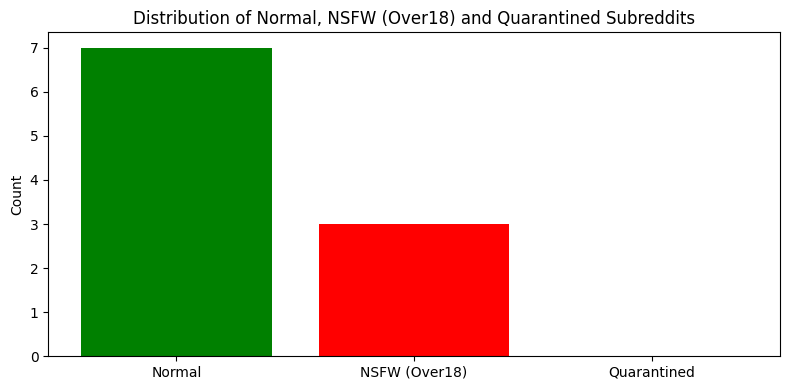

In [14]:
# 7. Over18、Quarantine 分布
# 计算每个类别的数量
over18_count = df['over18'].sum()  # NSFW 数量
quarantine_count = df['quarantine'].sum()  # Quarantined 数量
normal_count = len(df) - over18_count - quarantine_count  # Normal 数量

# 创建图形
plt.figure(figsize=(8, 4))

# 绘制条形图
plt.bar(['Normal', 'NSFW (Over18)', 'Quarantined'], [normal_count, over18_count, quarantine_count], color=['green', 'red', 'orange'])

# 设置图表标题和标签
plt.title('Distribution of Normal, NSFW (Over18) and Quarantined Subreddits')
plt.ylabel('Count')
plt.tight_layout()

# 显示图表
plt.show()
